In [74]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import tensorflow as tf
import numpy as np

In [75]:
print(tf.__version__)

2.12.0


In [76]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [77]:
print(type(test_images[0]))
print(test_images.shape)
print(test_images[0].shape)

<class 'numpy.ndarray'>
(10000, 28, 28)
(28, 28)


In [78]:
train_images=train_images.reshape(60000,784)
test_images=test_images.reshape(10000,784)

In [79]:
print(test_images.shape)
print(test_images[0].shape)

(10000, 784)
(784,)


In [80]:
train_labels.shape,test_labels.shape

((60000,), (10000,))

In [81]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [82]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
train_labels_a=train_labels.reshape(-1, 1)
enc.fit(train_labels_a)

onehotlabels = enc.transform(train_labels_a).toarray()
print(onehotlabels.shape)
print(train_labels[1])
print(onehotlabels[1])

train_labels=onehotlabels

(60000, 10)
0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [83]:
enc = preprocessing.OneHotEncoder()
test_labels_a=test_labels.reshape(-1, 1)
enc.fit(test_labels_a)

onehotlabels_test = enc.transform(test_labels_a).toarray()
print(onehotlabels_test.shape)
print(test_labels[1])

print(onehotlabels_test[1])

test_labels=onehotlabels_test

(10000, 10)
2
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


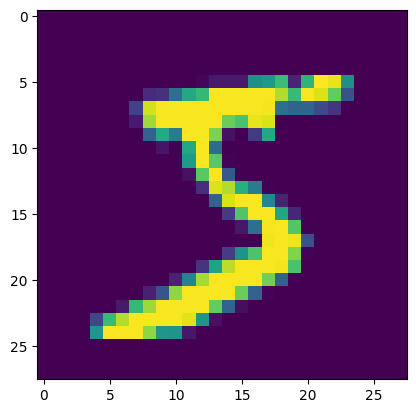

In [84]:
## plotting image
import matplotlib.pyplot as plt

image=train_images[0]
image=np.array(image,dtype='float')
image=image.reshape((28,28))

print(train_labels[0])
plt.imshow(image)
plt.show()

In [85]:
## initializing weights and biases

n_input=784
n_hidden_1=256
n_hidden_2=256
n_classes=10

weights={
    'h1':tf.Variable(tf.random.normal([n_input,n_hidden_1])),
    'h2':tf.Variable(tf.random.normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random.normal([n_hidden_2,n_classes]))
}

biases={
    'h1':tf.Variable(tf.random.normal([n_hidden_1])),
    'h2':tf.Variable(tf.random.normal([n_hidden_2])),
    'out':tf.Variable(tf.random.normal([n_classes]))
}

In [86]:
## forward propagation

def fwd_propagation(x,weights,biases):
  in_layer1=tf.add(tf.matmul(x,weights['h1']),biases['h1'])
  out_layer1=tf.nn.relu(in_layer1)                            ## rectified linear unit activation fn ( max(0,x)) ## basically we are replacing -ve values with 0

  in_layer2=tf.add(tf.matmul(out_layer1,weights['h2']),biases['h2'])
  out_layer2=tf.nn.relu(in_layer2)

  output=tf.add(tf.matmul(out_layer2,weights['out']),biases['out'])
  return output

In [87]:
##predictions
sess=tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())     # to initialize weights and biases
x=tf.compat.v1.placeholder("float" , [None,n_input])      # shape=[no_of_images,features]
y=tf.compat.v1.placeholder(tf.int32 , [None,n_classes])   #shape=[no_of_images,total_no_of_classes]
pred=fwd_propagation(x,weights,biases)

In [88]:
## COST (inbuilt cost fn)

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y)) ## reduce mean - to calc mean

In [89]:
predictions=tf.argmax(pred,1)             # 1 -> axis
true_labels=tf.argmax(y,1)
correct_predictions=tf.equal(predictions,true_labels)

In [90]:
pred_eval,labels,correct_pred=sess.run([predictions,true_labels,correct_predictions],feed_dict={x:test_images,y:test_labels})
pred_eval,labels,correct_pred

(array([1, 1, 0, ..., 1, 1, 1]),
 array([7, 2, 1, ..., 4, 5, 6]),
 array([False, False, False, ..., False, False, False]))

In [91]:
correct_pred.sum()
## out of 1000
## WITHOUT OPTIMIZING

1033

In [92]:
optimizer=tf.compat.v1.train.AdamOptimizer(learning_rate=0.09)
#optimizer=tf.optimizers.Adam(learning_rate=0.09)
optimize=optimizer.minimize(cost)

In [96]:
sess=tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())

In [97]:
for iter in range(100):
   c,o=sess.run([cost,optimize],feed_dict={x:train_images,y:train_labels})
   print(c)

338151.0
1175262.0
855934.0
567184.25
409346.94
163830.94
106747.23
58761.977
72731.2
66595.55
45647.5
34167.62
28337.361
21430.527
16933.004
15744.301
15268.559
13677.862
11662.125
10076.987
9089.239
8520.747
8128.524
7736.546
7282.273
6766.161
6230.3276
5730.063
5308.718
4966.592
4685.649
4442.3804
4207.555
3990.6404
3795.6555
3618.6357
3452.122
3290.23
3137.984
2998.7734
2873.8313
2760.359
2653.2576
2550.7747
2450.6052
2354.904
2266.629
2184.7302
2108.2393
2034.8529
1964.2023
1897.4752
1831.3988
1767.5083
1712.2693
1665.1095
1614.3575
1569.9749
1531.048
1488.5581
1443.5693
1401.6921
1362.4176
1323.8934
1289.2773
1255.765
1222.6195
1193.528
1163.3912
1133.4403
1107.9591
1082.1268
1057.5366
1033.3777
1009.0688
984.9328
962.5851
942.8976
919.9973
900.62994
883.2643
862.89105
845.1356
827.07654
809.1224
793.93445
777.7836
761.9924
746.1438
732.75934
719.9796
704.47894
692.5237
679.90454
666.7382
654.761
643.1748
631.00745
621.46173
609.5122


In [98]:
predictions=tf.argmax(pred,1)             # 1 -> axis
true_labels=tf.argmax(y,1)
correct_predictions=tf.equal(predictions,true_labels)
pred_eval,labels,correct_pred=sess.run([predictions,true_labels,correct_predictions],feed_dict={x:test_images,y:test_labels})


print(pred_eval)
print(labels)
print(correct_pred)


[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]
[ True  True  True ...  True  True  True]


In [99]:
##AFTER OPTIMIZING
##Out if 10000 test images
correct_pred.sum()

8282

In [100]:
import tensorflow as tf

In [101]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [102]:
print(type(x_train))
print(x_train.shape)
print(x_train[0].shape)

<class 'numpy.ndarray'>
(60000, 28, 28)
(28, 28)


5


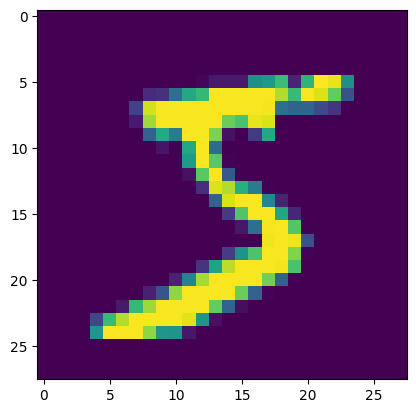

In [103]:
import matplotlib.pyplot as plt
image=x_train[0]
image=np.array(image,dtype='float')
image=image.reshape((28,28))

print(y_train[0])
plt.imshow(image)
plt.show()

(60000, 28, 28)
(28, 28)
5


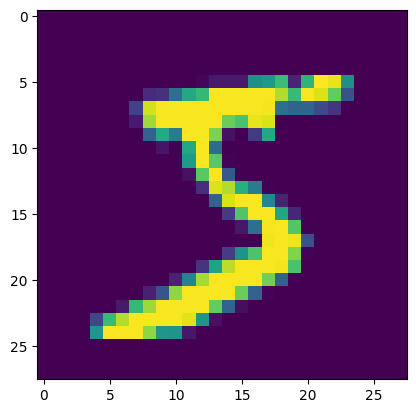

In [104]:
num_classes=10

print(x_train.shape)
print(x_train[0].shape)
image=x_train[0]
image=np.array(image,dtype='float')
image=image.reshape((28,28))

print(y_train[0])
plt.imshow(image)
plt.show()


In [105]:
x_train = np.expand_dims(x_train, -1) ##adds 1 more axis/dimension ##this is done bec we need channels
x_test = np.expand_dims(x_test, -1)

print(x_train.shape)
print(x_train[0].shape)
#x_train=np.reshape(x_train,(60000,28,28,1))
#x_test=np.reshape(x_test,(10000,28,28,1))

(60000, 28, 28, 1)
(28, 28, 1)


In [106]:
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

'''
a = tf.keras.utils.to_categorical([0, 1, 2, 3], num_classes=4)
print(a)

[[1 0 0 0]
[0 1 0 0]
[0 0 1 0]
[0 0 0 1]]
'''


'\na = tf.keras.utils.to_categorical([0, 1, 2, 3], num_classes=4)\nprint(a)\n\n[[1 0 0 0]\n[0 1 0 0]\n[0 0 1 0]\n[0 0 0 1]]\n'

In [107]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [108]:
x_train[0].shape

(28, 28, 1)

In [109]:

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , Flatten , Dense , Dropout

input_shape=(28,28,1)

model=Sequential()
model.add(Conv2D(32, (3,3) , strides=(1,1) , padding='same', input_shape= input_shape , activation = 'relu' ))
model.add(MaxPooling2D(pool_size=(2,2),strides=None ))

model.add(Conv2D(64, (3,3) , strides=(1,1) , padding='same',  activation = 'relu' ))
model.add(MaxPooling2D(pool_size=(2,2),strides=None ))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))  ## 10 -> no_of_classes



In [110]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train,
          y_train ,
          batch_size=32,
          validation_split=0.1,
          epochs=10)

model.summary()

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
53984/54000 [============================>.] - ETA: 0s - loss: 0.3517 - acc: 0.9386

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


54000/54000 [==============================] - 74s 1ms/sample - loss: 0.3516 - acc: 0.9386 - val_loss: 0.0745 - val_acc: 0.9782
Epoch 2/10
54000/54000 [==============================] - 74s 1ms/sample - loss: 0.0831 - acc: 0.9744 - val_loss: 0.0571 - val_acc: 0.9847
Epoch 3/10
54000/54000 [==============================] - 72s 1ms/sample - loss: 0.0668 - acc: 0.9794 - val_loss: 0.0538 - val_acc: 0.9863
Epoch 4/10
54000/54000 [==============================] - 74s 1ms/sample - loss: 0.0609 - acc: 0.9816 - val_loss: 0.0574 - val_acc: 0.9858
Epoch 5/10
54000/54000 [==============================] - 72s 1ms/sample - loss: 0.0540 - acc: 0.9840 - val_loss: 0.0574 - val_acc: 0.9852
Epoch 6/10
54000/54000 [==============================] - 73s 1ms/sample - loss: 0.0514 - acc: 0.9850 - val_loss: 0.0520 - val_acc: 0.9857
Epoch 7/10
54000/54000 [==============================] - 72s 1ms/sample - loss: 0.0443 - acc: 0.9861 - val_loss: 0.0497 - val_acc: 0.9885
Epoch 8/10
54000/54000 [==============

In [111]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.058315290701597064
Test accuracy: 0.9867
